In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [5]:
#loading dataset


df =pd.read_csv('titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#explorartory data analysis

In [7]:
#Check Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\divya\AppData\Local\Temp\ipykernel_22092\250808928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived",data=df,palette ='coolwarm')


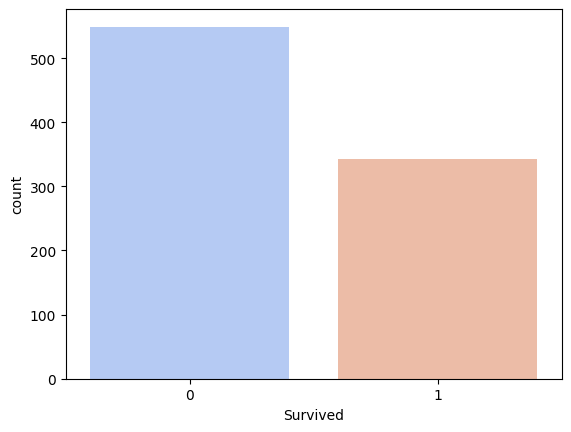

In [8]:
#Survival Rate Visualization

sns.countplot(x="Survived",data=df,palette ='coolwarm')
plt.show()

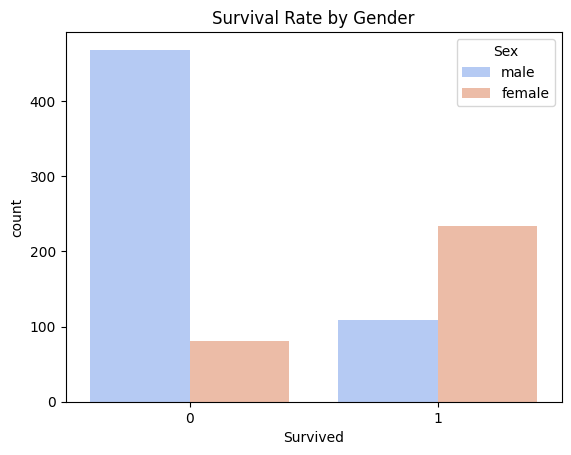

In [9]:
#wsurvival rate by gender

sns.countplot(x="Survived",hue="Sex",data=df,palette ='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()

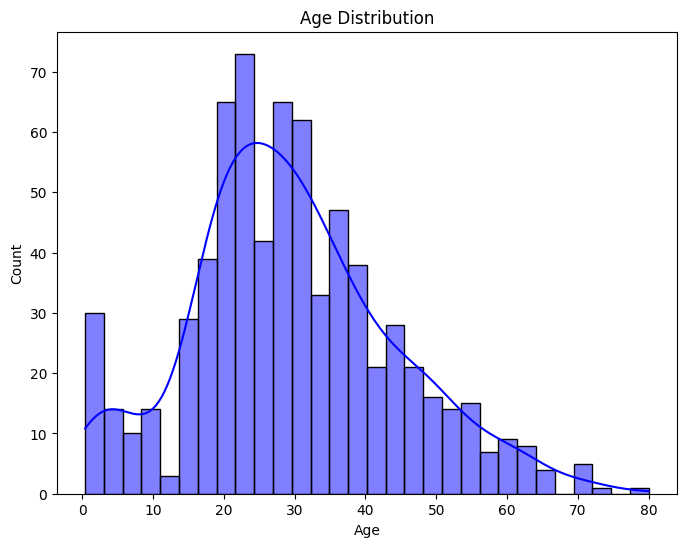

In [10]:
#Age Distribution

plt.figure(figsize=(8,6))
sns.histplot(df['Age'].dropna(),bins=30,kde=True,color='blue')
plt.title("Age Distribution")
plt.show()

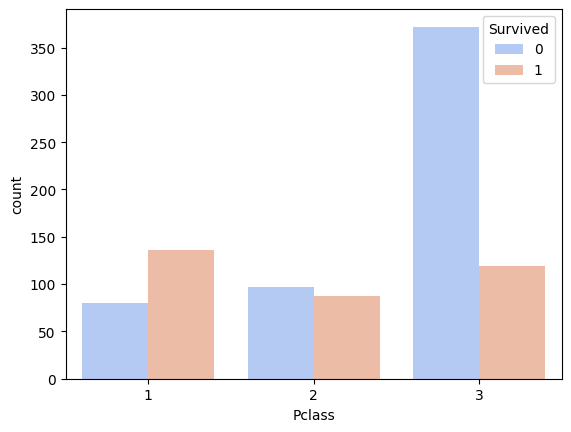

In [11]:
# Class Distribution

sns.countplot(x="Pclass",hue='Survived',data=df,palette='coolwarm')
plt.show()

### Data Preprocessing


In [12]:
#Handling Missing Values

# Fill missing Age values with median
df['Age'].fillna(df["Age"].median(),inplace=True)

# Fill missing Embarked values with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

# Drop the 'Cabin' column (too many missing values)
df.drop(columns=['Cabin','Ticket','Name','PassengerId'], inplace=True)


C:\Users\divya\AppData\Local\Temp\ipykernel_22092\2662092035.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].median(),inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_22092\2662092035.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [13]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
# Feature Selection & Encoding

In [19]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x=df[features]
y=df['Survived']

#Converting categorical Variable into numerical format
x['Sex']=x['Sex'].map({'male':0,'female':1})
x=pd.get_dummies(x, columns=['Embarked'],drop_first=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_22092\4285845041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex']=x['Sex'].map({'male':0,'female':1})


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
#Feature scalling

scaler =StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
# Model Training & Evaluation

#Train Logistic Regression Model
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [24]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [29]:
#Accuracy

accuracy= accuracy_score(y_test,y_pred)
print(f'accuracy is:{accuracy*100}')

accuracy is:80.44692737430168


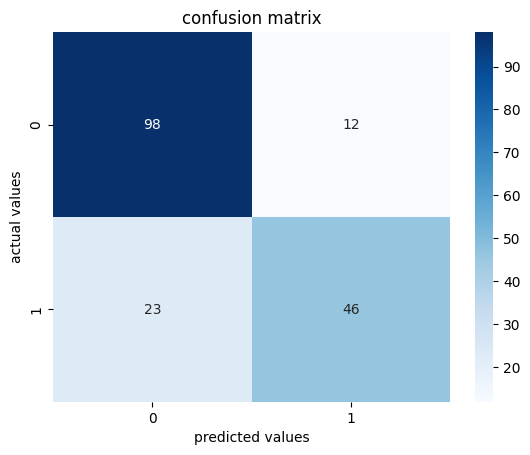

In [33]:
#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap='Blues')
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.title('confusion matrix')
plt.show()

In [39]:
# New passengers data: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_Q, Embarked_S]
new_passengers = np.array([
    [1, 1, 22, 1, 0, 100, 0, 0],  # 1st class, female, young, high fare
    [3, 0, 35, 0, 0, 8, 0, 1],    # 3rd class, male, mid-age, low fare
    [2, 1, 40, 1, 2, 50, 1, 0],   # 2nd class, female, older, with family
])

# Scale the new passengers' data using the trained scaler
new_passengers_scaled = scaler.transform(new_passengers)

# Predict survival
predictions = model.predict(new_passengers_scaled)

# Convert numerical predictions into labels
results = np.where(predictions == 1, "Survived ✅", "Did Not Survive ❌")

# Create a DataFrame for easy visualization
df_results = pd.DataFrame(new_passengers, columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"])
df_results["Prediction"] = results

# Display the results
print(df_results)


   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S  \
0       1    1   22      1      0   100           0           0   
1       3    0   35      0      0     8           0           1   
2       2    1   40      1      2    50           1           0   

          Prediction  
0         Survived ✅  
1  Did Not Survive ❌  
2         Survived ✅  


C:\Users\divya\anaconda3\envs\notebook_python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
#Plotting ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

In [47]:
# Get predicted probabilities for the positive class (Survived = 1)
y_probs =model.predict_proba(x_test)[:,1]
## Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)


In [48]:
# # Compute AUC (Area Under Curve)
auc_score = roc_auc_score(y_test,y_probs)
print(f'AUC_SCORE:{auc_score}')

AUC_SCORE:0.8433465085638999


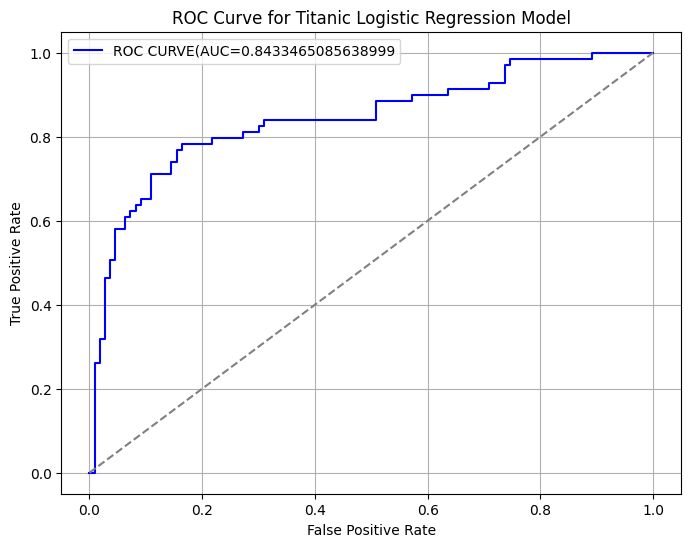

In [49]:
#plot ROC Curve

plt.figure(figsize =(8,6))
plt.plot(fpr,tpr,color='blue',label=f"ROC CURVE(AUC={auc_score}")
plt.plot([0,1],[0,1],linestyle="--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Titanic Logistic Regression Model")
plt.legend()
plt.grid()
plt.show()

In [51]:
print(y_test.shape)

(179,)


In [52]:
print(y_probs.shape)  

(179,)
